<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


*   Visualize the distribution of data.

*   Visualize the relationship between two features.

*   Visualize composition of data.

*   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

"wget" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


Connect to the database.


In [141]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [3]:
import pandas as pd

## Demo: How to run an sql query


In [4]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [5]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [6]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [7]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


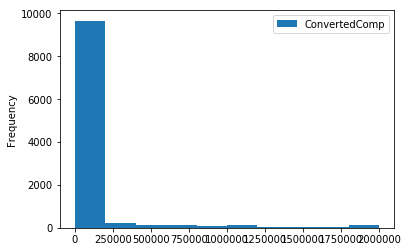

In [12]:
# your code goes here
QUERY = """
SELECT ConvertedComp
FROM master
"""
df = pd.read_sql_query(QUERY,conn)
ax = df.plot.hist()

### Box Plots


Plot a box plot of `Age.`


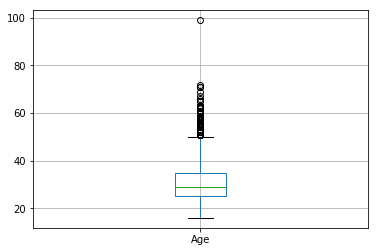

In [13]:
# your code goes here
QUERY = """
SELECT Age
FROM master
"""
df = pd.read_sql_query(QUERY,conn)
ax = df.boxplot()

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


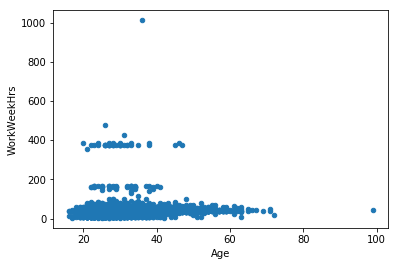

In [16]:
# your code goes here
QUERY = """
SELECT Age, WorkWeekHrs
FROM master
"""
df = pd.read_sql_query(QUERY,conn)
df.plot.scatter('Age', 'WorkWeekHrs')

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


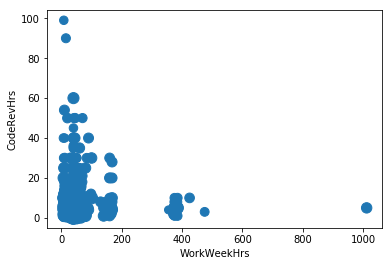

In [21]:
# your code goes here
QUERY = """
SELECT Age, WorkWeekHrs, CodeRevHrs
FROM master
"""
df = pd.read_sql_query(QUERY,conn)
df.plot.scatter(x="WorkWeekHrs", y="CodeRevHrs", s=df["Age"]*3);

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


In [78]:
# your code goes here
QUERY = """
SELECT *
FROM LanguageDesireNextYear
"""
df = pd.read_sql_query(QUERY,conn)
df.groupby(['LanguageDesireNextYear']).count().sort_values(by='Respondent')[::-1].head()

,Respondent
LanguageDesireNextYear,
JavaScript,6630
HTML/CSS,5328
Python,5239
SQL,5012
TypeScript,4088


In [79]:
# your code goes here
QUERY = """
SELECT *
FROM DatabaseDesireNextYear
"""
df = pd.read_sql_query(QUERY,conn)
df.groupby(['DatabaseDesireNextYear']).count().sort_values(by='Respondent')[::-1].head()

,Respondent
DatabaseDesireNextYear,
PostgreSQL,4328
MongoDB,3649
Redis,3331
MySQL,3281
Elasticsearch,2856


In [76]:
# your code goes here
QUERY = """
SELECT *
FROM LanguageWorkedWith
"""
df = pd.read_sql_query(QUERY,conn)
df.groupby(['LanguageWorkedWith']).count().sort_values(by='Respondent')[::-1].head()

,Respondent
LanguageWorkedWith,
JavaScript,8687
HTML/CSS,7830
SQL,7106
Bash/Shell/PowerShell,4642
Python,4542


In [109]:
# your code goes here
QUERY = """
SELECT *
FROM DatabaseWorkedWith
"""
df = pd.read_sql_query(QUERY,conn)
resp_1 = df['Respondent'].value_counts().loc[df['Respondent'].value_counts() == 1]
df_1 = df.loc[df['Respondent'].isin(resp_1.index)]
df_1.loc[df_1['DatabaseWorkedWith'] == 'MySQL'].count()

Respondent            474
DatabaseWorkedWith    474
dtype: int64

In [81]:
# your code goes here
QUERY = """
SELECT *
FROM DatabaseDesireNextYear
"""
df = pd.read_sql_query(QUERY,conn)
df_fivedb = df.groupby(['DatabaseDesireNextYear']).count().sort_values(by='Respondent')[::-1][0:5]
df_fivedb

,Respondent
DatabaseDesireNextYear,
PostgreSQL,4328
MongoDB,3649
Redis,3331
MySQL,3281
Elasticsearch,2856


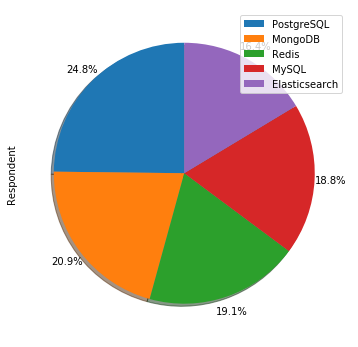

In [49]:
df_fivedb
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen']

df_fivedb.plot(y='Respondent', kind='pie', figsize=(15, 6), autopct='%1.1f%%', startangle=90, shadow=True,
               labels=None,                 # turn off labels on pie chart
               pctdistance=1.12,            # the ratio between the pie center and start of text label
              )

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


      WorkWeekHrs  CodeRevHrs
Age                          
30.0         40.0         4.0
31.0         40.0         4.0
32.0         40.0         4.0
33.0         40.0         4.0
34.0         40.0         4.0
35.0         40.0         4.0


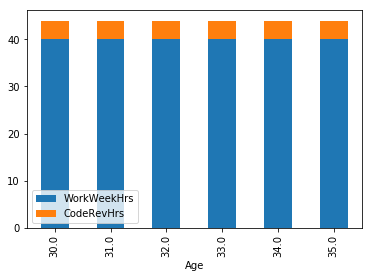

In [132]:
# your code goes here
QUERY = """
SELECT WorkWeekHrs, CodeRevHrs, Age
FROM master
where Age between 30 and 35
"""
df = pd.read_sql_query(QUERY,conn)
df_median = df.groupby('Age').median()
print(df_median)
df_median.plot.bar(stacked=True)

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


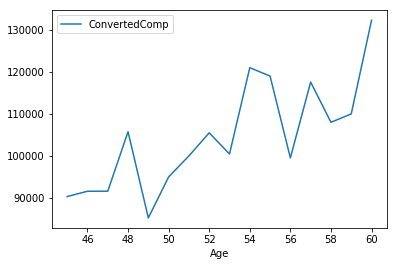

In [127]:
# your code goes here
QUERY = """
SELECT ConvertedComp, Age
FROM master
where Age between 45 and 60
"""
df = pd.read_sql_query(QUERY,conn)
df_median = df.groupby(['Age']).median()
df_median.reset_index(level=0, inplace=True)
df_median.plot(x='Age', y='ConvertedComp')

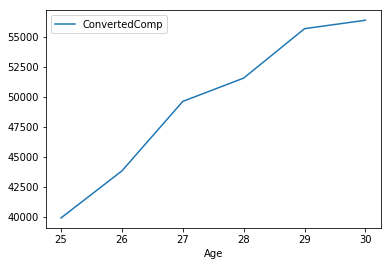

In [146]:
# your code goes here
QUERY = """
SELECT ConvertedComp, Age
FROM master
where Age between 25 and 30
"""
df = pd.read_sql_query(QUERY,conn)
df_median = df.groupby(['Age']).median()
df_median.reset_index(level=0, inplace=True)
df_median.plot(x='Age', y='ConvertedComp')

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


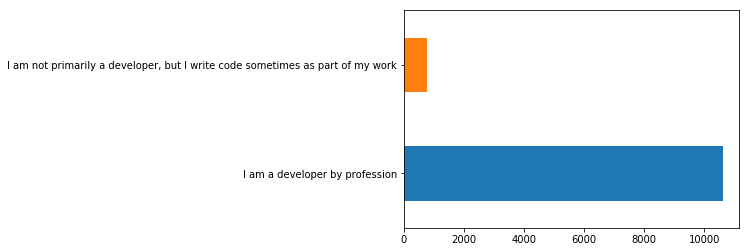

In [139]:
# your code goes here
# your code goes here
QUERY = """
SELECT MainBranch
FROM master
"""
df = pd.read_sql_query(QUERY,conn)
df['MainBranch'].value_counts().plot(kind='barh')

In [145]:
# your code goes here
# your code goes here
QUERY = """
SELECT *
FROM DevType
"""
df = pd.read_sql_query(QUERY,conn)
df['DevType'].value_counts()

Developer, full-stack                            6928
Developer, back-end                              6290
Developer, front-end                             3920
Developer, desktop or enterprise applications    2575
Developer, mobile                                1959
DevOps specialist                                1639
Database administrator                           1413
System administrator                             1202
Designer                                          988
Developer, QA or test                             911
Developer, embedded applications or devices       854
Engineer, data                                    832
Data scientist or machine learning specialist     803
Data or business analyst                          802
Student                                           766
Academic researcher                               556
Educator                                          514
Product manager                                   480
Developer, game or graphics 

Close the database connection.


In [147]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer\&utm_source=Exinfluencer\&utm_content=000026UJ\&utm_term=10006555\&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2021-01-01\&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264\&cm_mmca1=000026UJ\&cm_mmca2=10006555\&cm_mmca3=M12345678\&cvosrc=email.Newsletter.M12345678\&cvo_campaign=000026UJ).
